# Plotting in Python

In Python there are multiple libraries available for plotting. Here I give a short overview of the ones available, but today we will focus on two of them in particular: Seaborn for "normal" static plots and Plotly for interactive plots.

- matplotlib: the classic, very powerful (can even do animations!) but often also cumbersome to work with.
- Seaborn: builds on matplotlib and integrates nicely with Pandas dataframes.
- plotnine: for the R fans among you, the ggplot2 package from R has an equivalent in Python (although used very rarely)
- Plotly: Interactive graphics in which you can zoom in etc.
- Bokeh: great to create interactive, web-ready plots (similar to Plotly)
- Geoplotlib: Nice if you want to plot data on maps

## Seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this chapter we will learn how to customize default plots and we will see that seaborn is in the end a collection of functions to simplify statistical plots from pandas data frames.

The classic plotting library in Python is matplotlib. Although very powerful, it can be sometimes a bit painful to work with matplotlib directly. Here Seaborn comes into play: It integrates amazingly with Pandas dataframes to make it very easy for us to visualise and manipulate data.

In [4]:
#Seaborn has some example data sets, we should use these now:
sns.set_theme()
tips = sns.load_dataset("tips")
print(type(tips))
print(tips)

<class 'pandas.core.frame.DataFrame'>
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


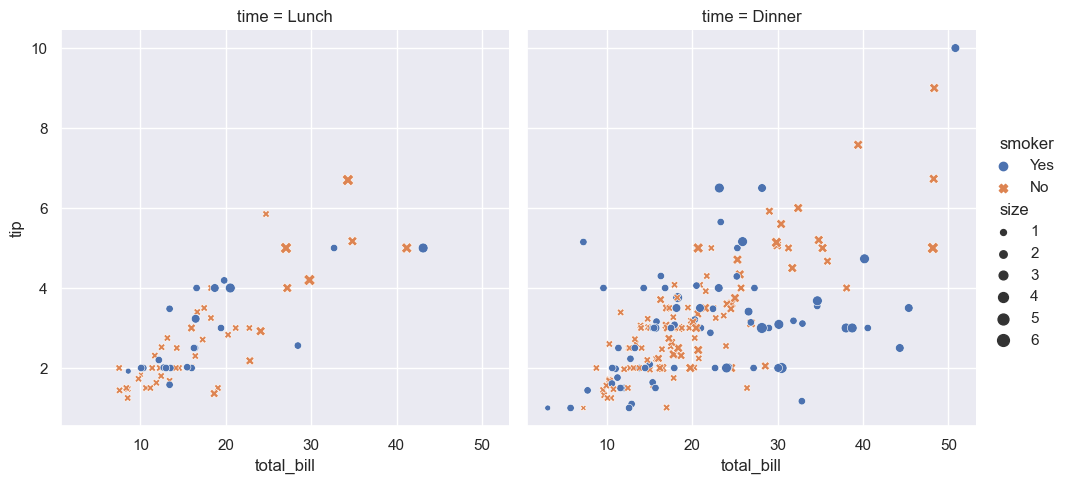

In [5]:
fig = sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue='smoker', style='smoker', size='size')


This plot is an example of a relational plot in Seaborn (relational since we relate the x to the y variable). In total there are three main categories of plots in Seaborn:

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" alt="drawing" width="500"/>


In addition to the different modules, there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The smaller boxes above are axes-level functions, whereas the bigger boxes are figure-level functions. Axes-level functions plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions as shown above.

Let's look at the penguin dataset, first via axes-level functions:

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

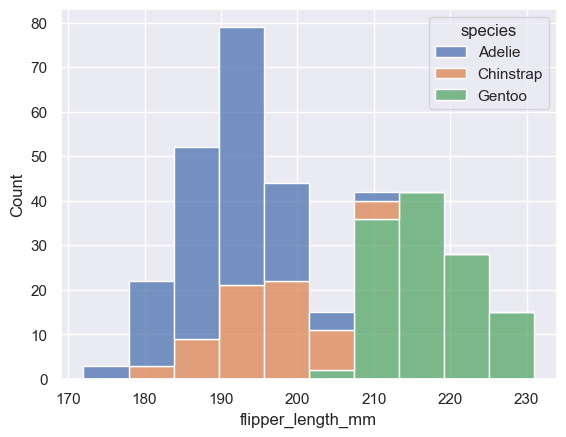

In [13]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

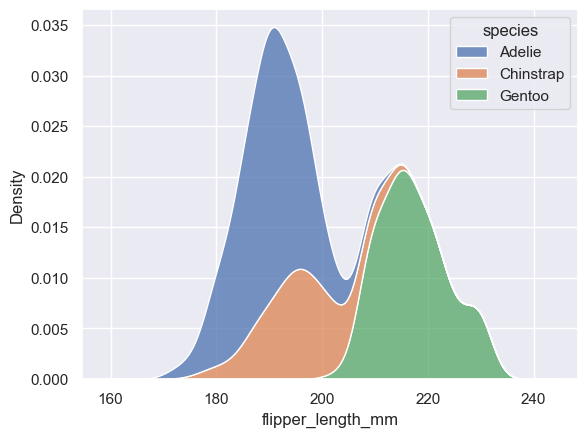

In [14]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")


Alternatively we can also use the figure-level function, which creates a `histplot` by default:

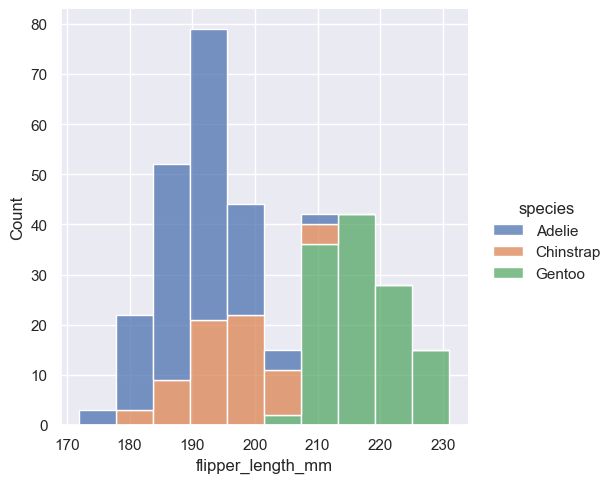

In [15]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")


We see that the plot is similar but not identical; the legend is outside of the plot for example.

By providing the `kind` parameter we can change the axes-level function that the figure-level function uses:

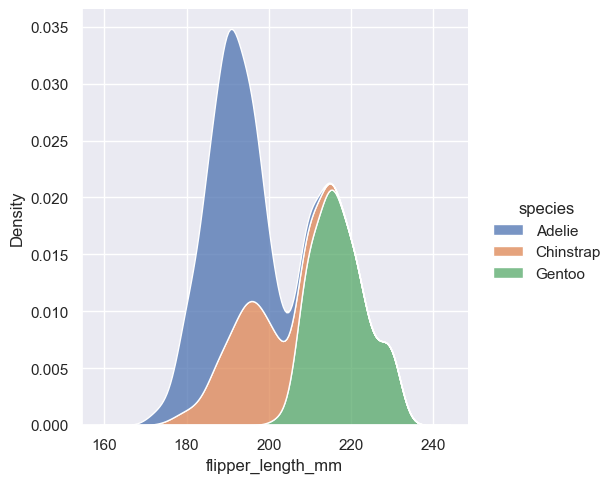

In [16]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")


Why do we have these two ways to plot you may ask? The big advantage of figure-level functions is that we can easily create more than one plot with one command and seaborn takes care of the rest. 
Above we had to stack the different variables in the histogram, but via a call to the figure-level function we can easily turn it into separate plots:

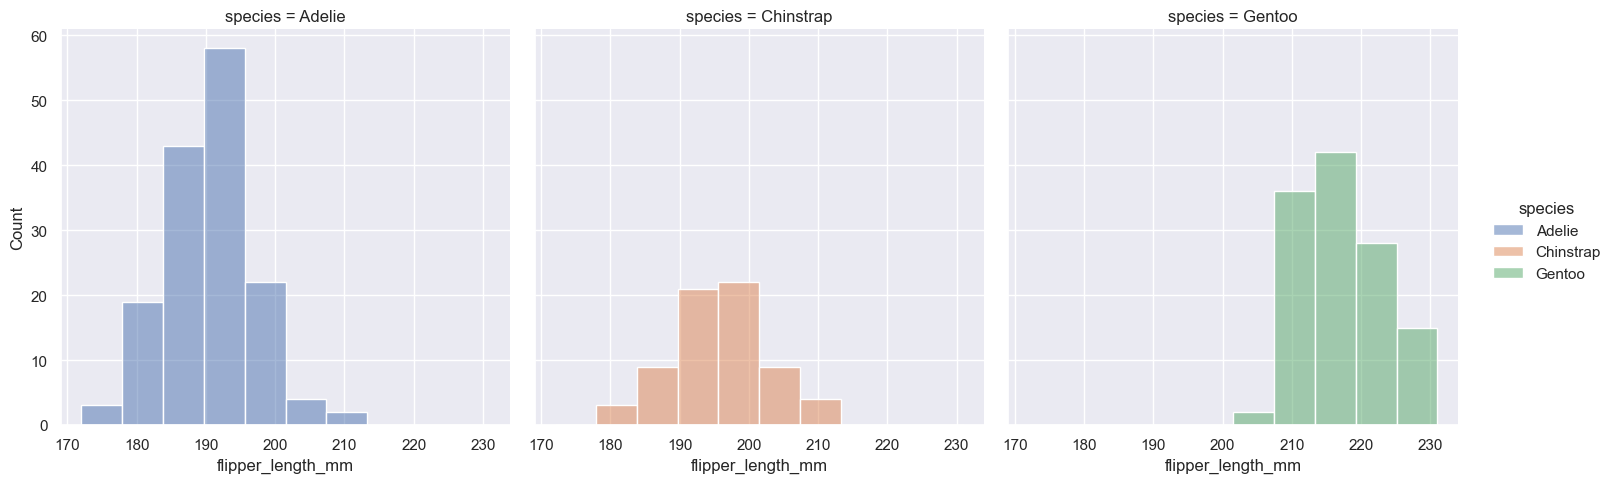

In [17]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")


Conclusion for this part: Use figure-level functions if you just use Seaborn and want to customize as little as possible. Use axes-level functions if you want to integrate Seaborn with lower-level matplotlib code. Here the advantages and drawbacks of figure-level functions from the [seaborn website](https://seaborn.pydata.org/tutorial/function_overview.html):


| Advantages                             | Drawbacks                                      |
|----------------------------------------|------------------------------------------------|
| Easy faceting by data variables        | Many parameters   not in function signature    |
| Legend outside of plot by default      | Cannot be part   of a larger matplotlib figure |
| Easy figure-level customization        | Different API   from matplotlib                |
| Different figure size parameterization | Different   figure size parameterization       |

The three main figure-level functions we showed above are intended for different kinds of data plotting. There are two other classes that go beyond just plotting: Regression plots such as `lmplot()` directly integrate statistical estimation tools in the graphic, wheras matrix plots help us with rectangular data.

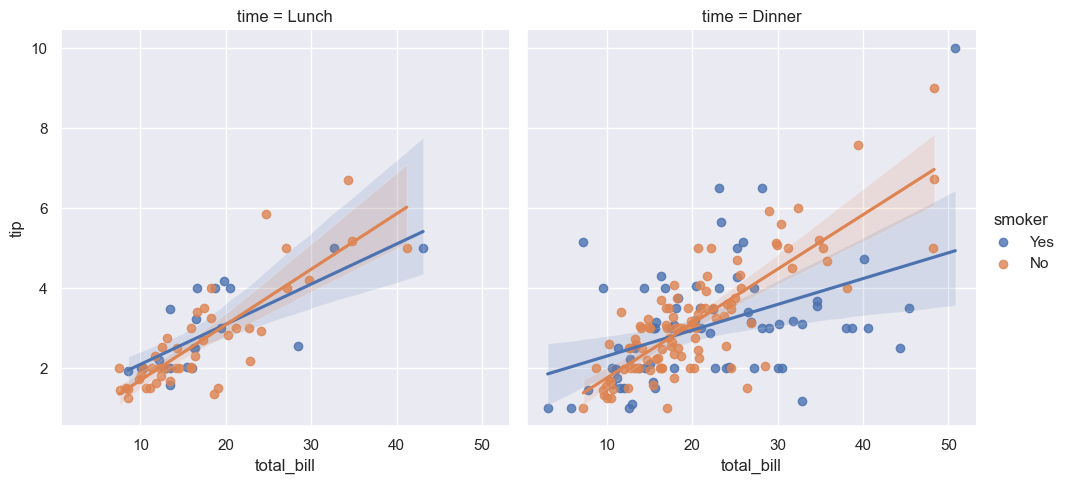

In [6]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

Categorical plots such as histograms are also easily created:

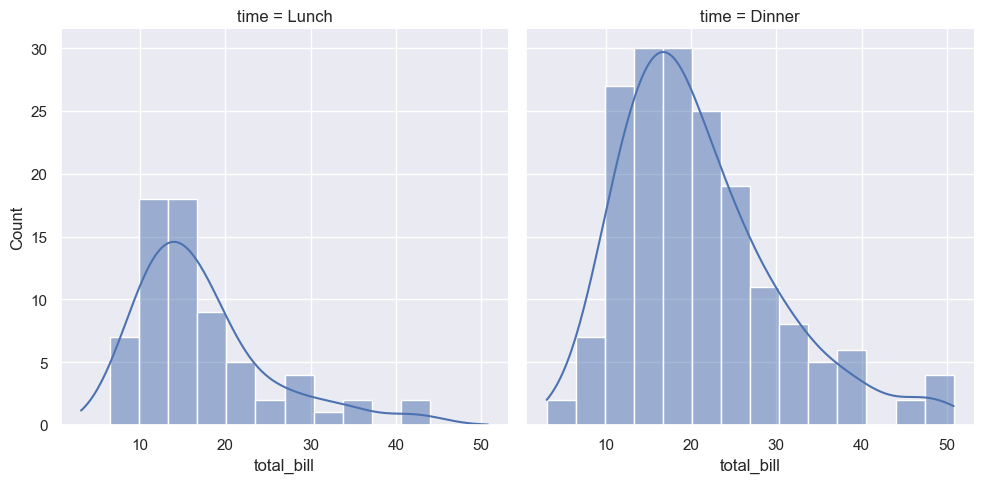

In [7]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Categorical data can be accessed via `catplot`:

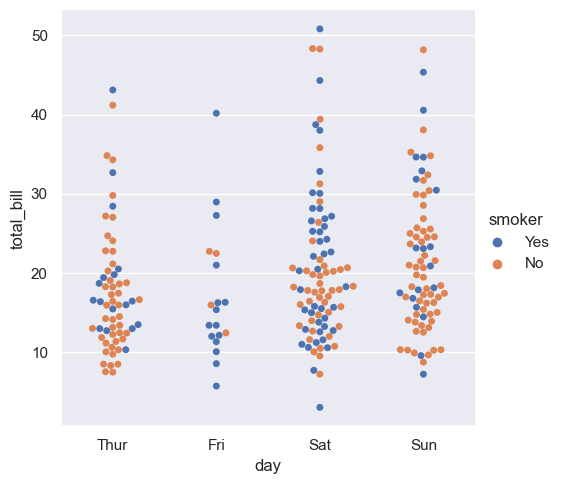

In [8]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")


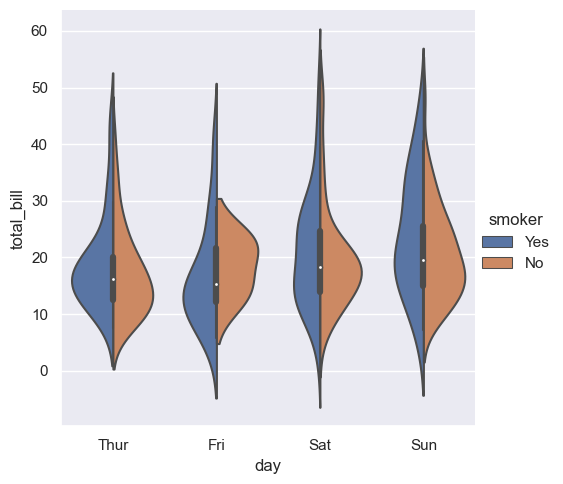

In [9]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)


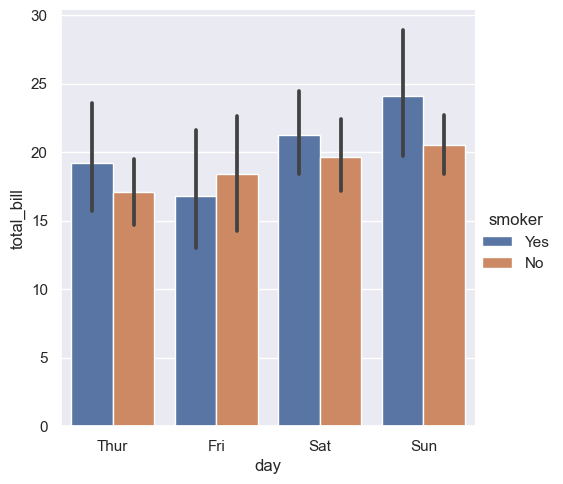

In [10]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")


Plots with multiple variables can easily be created via `joinplot()`:

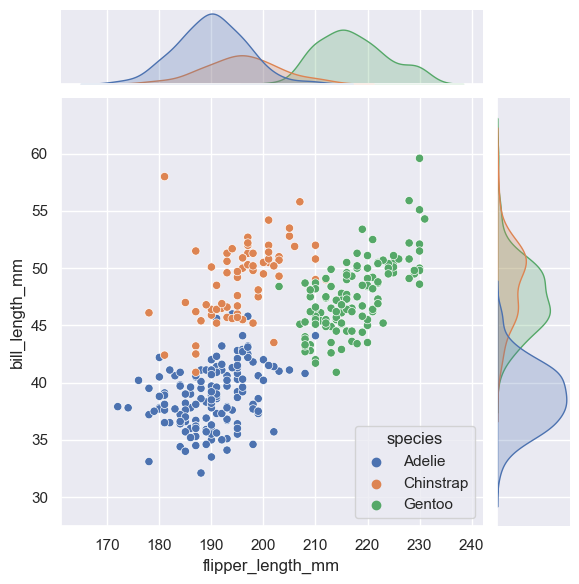

In [11]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

`Pairplot()` does somethings similar, but shows all of the pairwise distributions between variables:

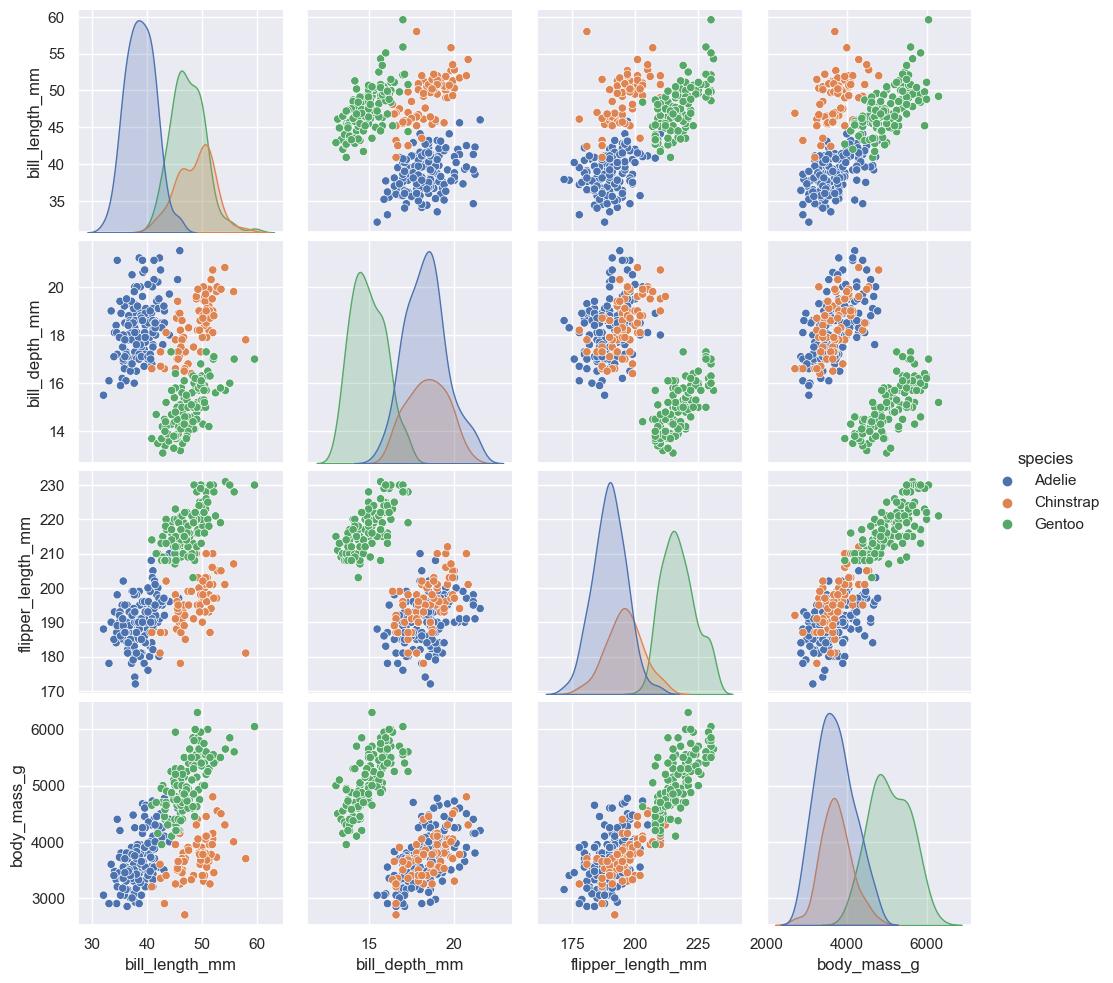

In [12]:
sns.pairplot(data=penguins, hue="species")


This overview has hopefully shown you how it easy it is to create great graphics from Pandas DataFrames!

Relationship to matplotlib (from the [website](https://seaborn.pydata.org/tutorial/introduction.html)):

Seaborn’s integration with matplotlib allows you to use it across the many environments that matplotlib supports, including exploratory analysis in notebooks, real-time interaction in GUI applications, and archival output in a number of raster and vector formats.

While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.

Matplotlib has a comprehensive and powerful API; just about any attribute of the figure can be changed to your liking. A combination of seaborn’s high-level interface and matplotlib’s deep customizability will allow you both to quickly explore your data and to create graphics that can be tailored into a publication quality final product.

